In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
!apt update && apt install -y graphviz
!pip install graphviz

In [ ]:
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py -O adspy_shared_utilities.py
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/CommViolPredUnnormalizedData.txt -O CommViolPredUnnormalizedData.txt

#TensorFlow / Scikit-learn
Ce cours de machine learning utilise uniquement la librairie scikit-learn. Comme elle requiert de stocker les données en mémoire, et qu'elle n'est pas multi-threadée, elle n'est plus adaptée lorsque le volume dépasse la capacité de la machine.

Lorsqu'on atteint ses limites, il faut basculer sur l'autres librairies comme TensorFlow, que nous utiliserons via Keras dans le cours de Deep Learning. En plus des réseaux de neurones, TensorFlow connait les algorithmes de machine learning comme la régression: https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/tutorials/estimators/linear.ipynb


#Régression Linéaire
**Le principe est simple: trouver la droite qui passe au plus près des points connus. Objectifs: **
- **faire mieux que la moyenne des points**
- **en tirer une estimation pour un point inconnu.**

Par exemple, supposons une étude sur le prix des maisons au mètre carré.

La surface est sur l'axe des abscisses, le prix est sur l'axe des ordonnées. Imaginons que nous connaissons le prix au mètre carré pour quelques maisons: nous pouvons les placer sur le graphique.

La régression calcule la droite qui passe "le plus près possible" de tous les points.

Si nous voulons calculer le prix pour une nouvelle maison, nous pouvons en avoir une estimation en plaçant cette maison sur la droite.

Ici nous avons pris un exemple simple, avec une seule feature (la surface de la maison). C'est la même chose si nous rajoutons des hypothèses pour affiner les résultats (le lieu, etc...): nous nous plaçons dans un espace de dimension N (N étant le nombre de features), et il faut trouver la droite qui passe au plus près des points dans cet espace.

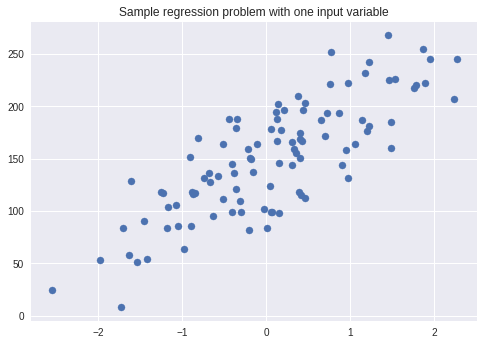

In [ ]:

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


##R-squared metric
Pour évaluer le gain apporté par la régression, on peut calculer le coefficient de détermination de la courbe, ou R-squared: https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination

Pour l'expliquer de façon synthétique:

- $RegressionQuality = GapBetweenTheLineAndThePoints = varianceOfThePointsAccordingToTheLine = \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2 $, où $y_i$ est l'ordonnée d'un point, et $\hat{y}_i$ est l'ordonnée du point correspondant sur la droite: plus cette valeur est proche de 0, meilleure est la droite de régression, car elle passe très près de tous les points.
- $SimpleAverageQuality = GapBetweenTheAverageAndThePoints = varianceOfThePoints = \sum\limits_{i=1}^n (y_i - \bar{y}_i)^2 $, où $\bar{y}_i$ est la moyenne des ordonnées des points: plus cette valeur est proche de 0, plus les points sont proches de la moyenne de leurs valeurs. Autrement dit, plus ils sont proches de la droite horizontale correspondant à leur moyenne. Encore autrement dit, moins il y a besoin d'une régression pour améliorer les résultats.
- $R^2 = 1 - \frac{\sum\limits_{i=1}^n (y_i - \hat{y}_i)^2}{\sum\limits_{i=1}^n (y_i - \bar{y}_i)^2} = 1 - \frac{RegressionQuality}{SimpleAverageQuality}$

**Sa valeur maximale est 1, qui indique que la droite de régression est parfaite, puisqu'elle prédit parfaitement les points**: l'écart entre la droite et les points est égal à 0.

**Lorsque R-squared est proche de 0, la régression apporte un bénéfice quasi-nul**: il faut essayer une courbe, et pas une simple droite. On peut essayer une régression polynomiale, comme nous le verrons dans la suite de ce cours.

**Lorsqu'il est négatif, c'est mauvais signe: ** cela signifie que la droite calculée par l'algorithme donne un moins bon résultat que la simple moyenne des points: https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


Lorsqu'il y a une seule feature, on est dans un espace à 2 dimensions, et la régression calcule une droite d'équation:

$y = linreg.coef{\_} \cdot X + linreg.intercept{\_}$

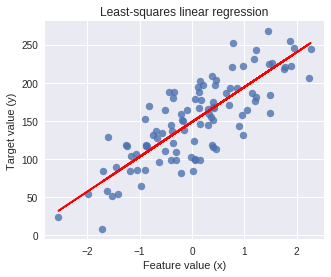

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

Lorsqu'il y a N features, on est dans un espace à N+1 dimensions, et la régression calcule une droite d'équation:

$ y = linreg.coef{\_}[1] \cdot X_1 + ... + linreg.coef{\_}[N] \cdot X_N + linreg.intercept{\_} $

On a un coefficient par feature. Autrement dit, linreg.coef_ est un vecteur de dimension N.

In [ ]:

from adspy_shared_utilities import load_crime_dataset

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725979102
linear model coeff:
[ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482726e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414

#Mathematics of regression
Comme nous l'avons vu, la droite de régression essaie de minimiser son écart avec tous les points. Il existe plusieurs façons de s'y prendre: http://scikit-learn.org/stable/modules/linear_model.html

Dans ce cours, nous allons étudier les méthodes les plus courantes:
- MSE (Mean Squared Error): quand on parle de régression linéaire, on fait en général référence à cette méthode, qui est la plus simple
- Lasso et Ridge, aka Regression avec regularization L1 et L2
- Logistic regression, qui est utilisée pour la classification

Nous introduisons également la Stochastic Gradient Descent (SGD), qui permet à l'algorithme de fonctionner lorsqu'il y a trop de données pour tenir en mémoire.


##Mean squared error

Il existe plusieurs façons de représenter la distance entre une droite et un point, mais pour la régression on utilise généralement l'écart entre les ordonnées, car cela donne des formules relativement simples à exploiter.

Le but est de réduire la somme des carrés de ces écarts.

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/MeanSquaredError1.PNG)

##Cost function
Dans l'exemple simple où il y a une seule feature, la droite recherchée a pour équation:

$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x$   , et on cherche les valeurs "idéales" de $\Theta_0$ et $\Theta_1$

Pour cela, on veut trouver le minimum d'une fonction, dite **cost function**, qui calcule la somme des écarts entre la droite et chaque point:

$J(\Theta_0, \Theta_1)=\frac{1}{2m}\cdot\sum\limits_{i=1}^m(h_\Theta(x_i) - y_i)^2$ où m est le nombre de points, et $h_\Theta(x_i) - y_i$ est l'écart entre la droite et le $i^{ème}$ point

On veut trouver la valeur des coefficients $\Theta_0$ et $\Theta_1$ pour lesquels $J(\Theta_0, \Theta_1)$ est minimale.

Comme $J(\Theta_0, \Theta_1)$ dépend de 2 variables, nous pouvons représenter cette courbe dans un espace à 3 dimensions.

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/MeanSquaredError2.PNG)

Par ailleurs, étant donné son équation, elle est convexe, et a donc un minimum global.

Dans cet exemple, ce minimum est très simple à trouver: il suffit de dériver la fonction et de trouver en quel point ses dérivées partielles sont égales à 0. Il existe aussi une solution avec un calcul matriciel, nous allons le voir juste après.


##Vectorization
Jusqu'ici, nous avons étudié un exemple simple, où les points avaient une seule feature. La droite de régression avait pour équation:
$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x$

Dans le cas général, les points peuvent avoir un nombre n de features, n pouvant être très grand. Pour reprendre l'exemple de l'image RBG de 500x1000 pixels, n vaut 1.500.000.
Nous obtenons une droite d'équation: 

$h_\Theta(x_1, ..., x_n) = \Theta_0 + \Theta_1 \cdot x_1 + ... + \Theta_n \cdot x_n$

Cette équation peut s'écrire sous la forme d'une multiplication de 2 vecteurs:

$h_\Theta(X) = \Theta^T X$ avec $\Theta = \begin{bmatrix} \Theta_0 \\ \Theta_1 \\ ... \\ \Theta_n \end{bmatrix}$ et $X = \begin{bmatrix} 1 \\ x_1 \\ ... \\ x_n \end{bmatrix}$

Par ailleurs, si nous avons m points, ayant chacun N features, il est possible de les représenter dans une matrice X de dimension (m, N+1). Ici, on a m=4 (car il y a 4 exemples de maison) et N=4 (car chaque maison a 4 features: size, number of bedrooms, number of floors, age):

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/Vectorization1.PNG)



##Normal equation

Il est possible de calculer directement les coefficients $\Theta_i$ du vecteur $\Theta$ à l'aide de **l'équation normale**:

$\Theta = (X^T X)^{-1} X^T y$

En pratique, l'équation normale flanche lorsque m et N deviennent trop grands: 
- les données ne tiennent pas en mémoire
- le temps de calcul explose, car le calcul de $(X^T X)^{-1}$ est très consommateur

Ceci dit, **la librairie sk-learn que nous utilisons ici pour faire de la régression utilise l'équation normale.** En effet, elle est conçue pour les problèmes pour lesquels m et N ne sont pas trop grands, ie. les données peuvent toutes tenir en mémoire.

##Gradient Descent
Lorsque le temps de calcul de l'équation normale explose, on peut utiliser l'algorithme du **gradient descent**.

Le principe est très simple:
- se placer quelque part sur la courbe, au hasard. Par exemple, on prend le point de coordonnées ($\Theta_0 = 0$, $\Theta_1 = 0$)
- descendre le long de la courbe, par petits pas de longueur $\alpha$

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/images/gradient_descent.gif)


```
Repeat until convergence, for the m points of the dataset per iteration {
```
  $\Theta_j = \Theta_j - \alpha \cdot \frac{\partial J(\Theta_j)}{\partial \Theta_j}$, by doing a simultaneous update of all the partial derivatives of $J(\Theta_0, \Theta_1)$ at each iteration
```
}
```

**Vous n'aurez jamais besoin de le coder, il l'est déjà dans les librairies que nous allons utiliser.** Nous expliquons son fonctionnement car il est à la base des réseaux de neurones, et il faut comprendre le rôle du **learning rate** pour pouvoir améliorer les résultats donnés par l'algorithme.

Cet algorithme, ou une de ses variantes, est le seul qui fonctionne avec les réseaux de neurones, car:
- La fonction d'activation, que nous détaillerons dans la partie Deep Learning, rompt la linéarité mathématique, et l'équation normale ne fonctionne pas
- Toujours à cause de la fonction d'activation, la fonction $J(\Theta)$ n'est pas convexe: elle peut avoir des creux et des pics. Autrement dit, elle peut avoir des minima locaux, éloignés du minimum global que nous souhaitons trouver.

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/GradientDescent1.PNG)

##Learning rate

Le coefficient $\alpha$ est baptisé **learning rate**; il est extrêmement important de bien le choisir pour que la descente le long de la courbe se passe bien.

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/GradientDescent2.PNG)

En principe il n'y a pas besoin de ralentir la descente quand on approche du minimum. Nous verrons qu'en pratique, il existe de nombreuses stratégies pour accélérer la descente en jouant sur le learning rate.

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/GradientDescent3.PNG)

##Vectorization de la Gradient Descent
**L'utilisation d'une matrice X pour stocker tous les points, d'un vecteur $\Theta$ pour stocker les coefficients $\Theta_i$ et d'un vecteur $y$ pour stocker les résultats $y_i$ permet de simplifier grandement l'écriture de l'algorithme.** 

La cost function devient:

$J(\Theta) = \frac{1}{2m} \cdot (X \Theta - y)^T \cdot (X \Theta - y)$

Et l'algorithme de la descente de gradient tient en une ligne, sans boucle 'for' pour itérer sur les divers coefficients $\Theta_i$, $X_i$ et $y_i$:

```
Repeat until convergence {
```
  $\Theta = \Theta - \alpha \cdot \frac{1}{m} \cdot (X \Theta - y)^T X$
```
}
```

NB: $(X \Theta - y)^T X$ est le résultat de la dérivée de $J(\Theta)$

**Et surtout, l'utilisation de matrices et de vecteurs permet d'exploiter les GPU des cartes graphiques, qui sont justement optimisés pour les calculs matriciels.**

##Variantes et optimisations
A chaque itération, l'algorithme décrit jusqu'ici opère sur l'ensemble des données:
- la matrice X contient toutes les données: s'il y a m données ayant chacune N features, X est une matrice de taille (m, N+1)
- on divise par m dans la cost function

Lorsque l'algorithme opère sur toutes les données, **on l'appelle Batch Gradient Descent.**

Bien souvent, il arrive qu'il y ait trop de données pour tenir en mémoire, ou que les calculs soient lents. Dans ce cas, on opte pour d'autres variantes, baptisées **Stochastic Gradient Descent**, quand on itère sur chaque donnée, ou **Mini batch gradient descent**, quand on découpe les données en plusieurs lots:
- on découpe les données en plusieurs lots qui peuvent tenir en mémoire
- on itère sur chaque lot
- quand on a itéré sur tous les lots, on considère qu'on a terminé un "epoch"
- on recommence jusqu'à avoir atteint le minimum de la courbe, comme pour la Batch Gradient Descent

Each mini-batch must have approximately the same repartition as the full dataset: si certains lots orientent la descente dans un sens, et d'autres l'orientent dans un autre sens, elle va patiner. 
Therefore, we usually have to shuffle the data randomly before splitting it into mini-batches. 
Malgré tout, la descente va être plus erratique avec la SGD. En rouge, on voit la Batch Gradient Descent, qui va directement vers le minimum, et en rose, on voit la SGD:

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/GradientDescent.jpg)

On trouvera des explications plus précises ici: https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

Sometimes, the gradient descent slows down or stops at "saddle points", as shown in the 2nd image.
Pour résoudre ce problème, il existe des optimisations très performantes, massivement utilisées avec les réseaux de neurones: https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms

Les plus utilisées sont:
- Le momentum: chaque itération est (un peu) orientée dans le sens des précédentes, en donnant plus de poids aux itérations récentes. On obtient un effet d'accélération ou d'inertie dans une certaine direction, ce qui évite des oscillations erratiques.
- RMSProp: chaque coefficient $\Theta_i$ fait l'objet de son propre learning rate $\alpha_i$, qui diminue petit à petit en fonction des gradients précédents. Il y a une subtilité qui rend cette variante plus efficace que les autres: les gradients précédents sont pris en compte de façon exponentiellement moindre (ie. le précédent est pris en compte, celui d'avant aussi, mais beaucoup moins, etc...) 
- Adam: mélange de momentum et de RMSProp, ce qui le rend le plus rapide de tous
- A faster variant of Adam, called [AdamW](http://www.fast.ai/2018/07/02/adam-weight-decay/) was recently found out, but it is not implemented yet in Keras.

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/contours_evaluation_optimizers.gif)
![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/saddle_point_evaluation_optimizers.gif)

##Normalization pour la Gradient Descent
Nous avons déjà étudié la normalization des données dans le cadre des k-nearest neighbors.

La normalization est utile également pour la gradient descent: lorsqu'une feature a une amplitude beaucoup plus large que les autres, la courbe de la cost function est très étirée, et la descente le long de la courbe a tendance à patiner:

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/GradientDescent4.PNG)

Elle est beaucoup plus efficace si les features ont toutes la même amplitude:

![Image](http://www.eyrignoux.com.fr/coursIA/machineLearning/GradientDescent5.PNG)